## Lib

In [22]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from sklearn.linear_model import LinearRegression, RidgeCV, LogisticRegression, SGDRegressor,LarsCV,ElasticNetCV,LassoCV
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import seaborn as sns

In [25]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pickle

## Data

In [26]:
with open("features_training_model.pkl", 'rb') as f:
    loaded_list = pickle.load(f)

In [27]:
data = pd.DataFrame(loaded_list)

In [28]:
list_feature = [i for i in range(0,37) if data[i].isna().sum() < 189]

In [54]:
data_merge = data[list_feature]
data_merge

,0,1,2,3,4,5,6,7,10,11,...,19,20,24,25,26,30,32,33,34,36
0,9.80,0.0,2.23,NaN,2.07,75.40,14.60,85.5,8350.0,100.0,...,0.0,4.70,6.054,4064.8,6.054,0.387,1.558,6395.1,14.225,0.794
1,12.40,0.0,1.36,NaN,2.48,74.24,18.60,98.9,1112.0,100.0,...,0.0,2.00,3.699,630.5,3.698,0.351,1.096,4716.6,7.939,0.736
2,12.30,0.0,3.05,NaN,2.66,74.26,18.50,98.5,1530.0,100.0,...,0.0,11.10,5.446,751.6,5.445,0.365,1.802,6084.7,12.489,0.762
3,14.50,0.0,1.46,NaN,2.22,73.40,21.80,97.0,2122.0,100.0,...,0.8,1.40,4.777,734.7,4.777,0.397,1.350,5288.3,11.704,0.757
4,11.30,0.0,1.46,NaN,2.59,74.71,16.80,86.8,1342.0,100.0,...,0.0,3.80,3.693,1067.6,3.693,0.336,1.172,4563.1,7.893,0.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,8.98,5131.0,0.50,98.97,1.68,75.80,13.54,72.8,2110.0,99.8,...,NaN,12.46,4.794,584.3,4.794,0.345,1.842,5365.6,9.990,0.723
248,9.47,1296.0,0.01,97.09,1.83,75.54,14.15,97.7,652.0,94.9,...,NaN,1.08,3.761,394.1,3.761,0.340,1.280,4156.1,7.857,0.686
249,12.27,3084.0,0.93,98.30,1.78,74.29,18.38,72.2,1002.0,98.7,...,NaN,0.93,3.246,614.1,3.246,0.280,1.330,4816.2,5.912,0.655
250,11.51,1752.0,0.55,98.76,1.56,74.61,17.21,68.6,1031.0,100.0,...,NaN,0.31,3.642,480.9,3.642,0.234,1.832,5112.4,6.169,0.659


In [85]:
data_temp = data_merge.copy()

In [88]:
for i in data_temp.columns:
  data_temp[i].fillna(data_temp[i].mode()[0], inplace =True)

In [89]:
data_temp

,0,1,2,3,4,5,6,7,10,11,...,19,20,24,25,26,30,32,33,34,36
0,9.80,0.0,2.23,98.99,2.07,75.40,14.60,85.5,8350.0,100.0,...,0.0,4.70,6.054,4064.8,6.054,0.387,1.558,6395.1,14.225,0.794
1,12.40,0.0,1.36,98.99,2.48,74.24,18.60,98.9,1112.0,100.0,...,0.0,2.00,3.699,630.5,3.698,0.351,1.096,4716.6,7.939,0.736
2,12.30,0.0,3.05,98.99,2.66,74.26,18.50,98.5,1530.0,100.0,...,0.0,11.10,5.446,751.6,5.445,0.365,1.802,6084.7,12.489,0.762
3,14.50,0.0,1.46,98.99,2.22,73.40,21.80,97.0,2122.0,100.0,...,0.8,1.40,4.777,734.7,4.777,0.397,1.350,5288.3,11.704,0.757
4,11.30,0.0,1.46,98.99,2.59,74.71,16.80,86.8,1342.0,100.0,...,0.0,3.80,3.693,1067.6,3.693,0.336,1.172,4563.1,7.893,0.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,8.98,5131.0,0.50,98.97,1.68,75.80,13.54,72.8,2110.0,99.8,...,0.0,12.46,4.794,584.3,4.794,0.345,1.842,5365.6,9.990,0.723
248,9.47,1296.0,0.01,97.09,1.83,75.54,14.15,97.7,652.0,94.9,...,0.0,1.08,3.761,394.1,3.761,0.340,1.280,4156.1,7.857,0.686
249,12.27,3084.0,0.93,98.30,1.78,74.29,18.38,72.2,1002.0,98.7,...,0.0,0.93,3.246,614.1,3.246,0.280,1.330,4816.2,5.912,0.655
250,11.51,1752.0,0.55,98.76,1.56,74.61,17.21,68.6,1031.0,100.0,...,0.0,0.31,3.642,480.9,3.642,0.234,1.832,5112.4,6.169,0.659


## Model

In [90]:
def train_model(data_merge, model , scalera):
  X = data_merge[data_merge.columns.drop([36])]
  y = data_merge[36]
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 ,random_state = 42)
  pipe = Pipeline([('scaler', scalera),
                ('transform',PolynomialFeatures(degree =1)),
                ('model', model)])
  pipe.fit(X_train,y_train)
  y_pred = pipe.predict(X_test)
  r2 = r2_score(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  print("R2_score: ",r2)
  print("MSE score: ",mse)
  print("MAE score: ",mae)
  try:
    if(model.__class__.__name__ == "CatBoostRegressor"):
      feature_importance = pipe['model'].get_feature_importance(type='FeatureImportance')
    elif (model.__class__.__name__ == "LGBMRegressor"):
      feature_importance = pipe['model'].feature_importances_
    elif (model.__class__.__name__ == "XGBRegressor"):
      feature_importance = pipe['model'].feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance[1:] })
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
  except:
    feature_importance_df = pd.DataFrame([])
  sns.set(rc={'figure.figsize':(6,3.5)})
  sns.kdeplot(y_pred, label ="prediction")
  sns.kdeplot(y_test, label = "True")
  plt.legend()
  plt.title(f"{model}")
  plt.show()
  return { f"{model.__class__.__name__}" :
   {
      "R2_score": round(r2,4),
      "MSE" : round(mse,4),
      "MAE" : round(mae,4),
      "Importance" : feature_importance_df
  }}

In [91]:
def auto_train():
  model_list = [LinearRegression(),SGDRegressor(),RidgeCV(),ElasticNetCV(),LassoCV(),LarsCV()]
  regressors = [
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    LinearSVR(),
    DecisionTreeRegressor(),
    GaussianProcessRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor()
]
  final_list  = model_list + regressors
  result_list = {}
  for model in final_list:
    result_list.update(train_model(data_temp, model ,MinMaxScaler(feature_range=(0, 1))))
  return result_list

R2_score:  0.7979259853625721
MSE score:  0.00039365991400072133
MAE score:  0.01572967709214867


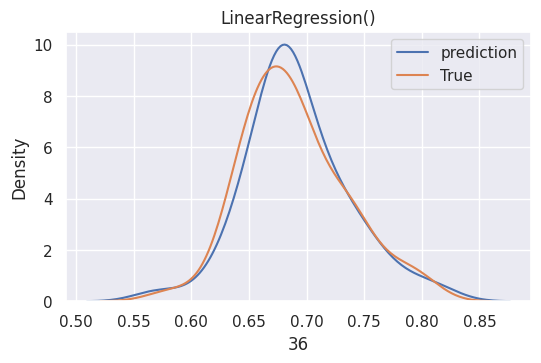

R2_score:  0.6170903338587779
MSE score:  0.000745945422590121
MAE score:  0.02264399759957182


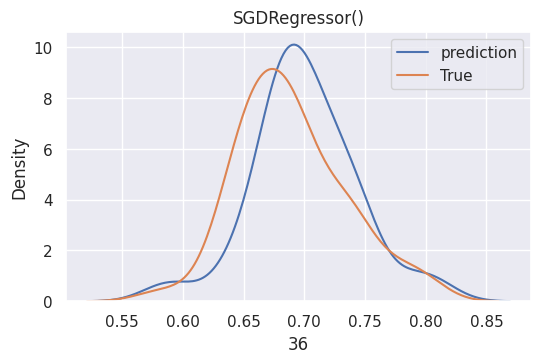

R2_score:  0.8209701865986179
MSE score:  0.0003487675596172356
MAE score:  0.014921929001983733


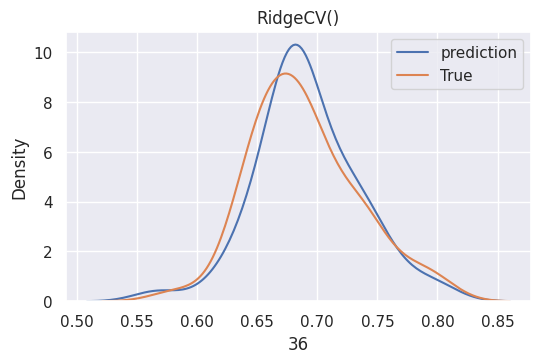

R2_score:  0.8210032388709672
MSE score:  0.000348703170562988
MAE score:  0.014971309501233399


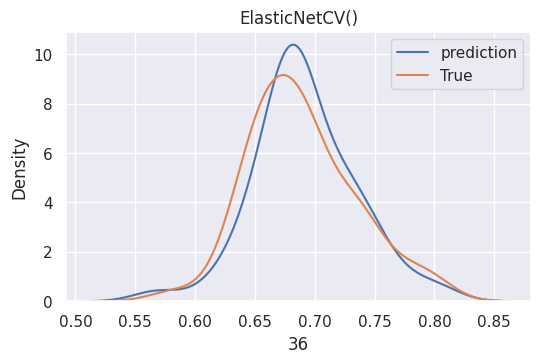

R2_score:  0.8210932413490057
MSE score:  0.0003485278369465995
MAE score:  0.014966729558466056


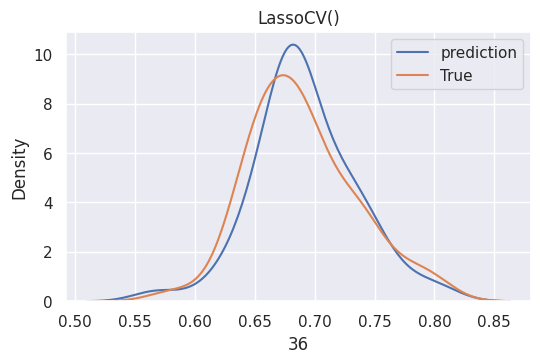

R2_score:  -1.5425090715620047
MSE score:  0.0049530559594858975
MAE score:  0.05080717300013836


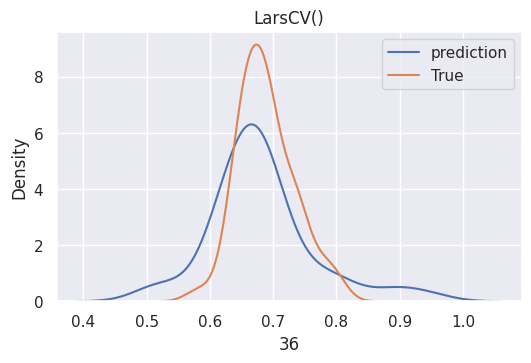

R2_score:  0.8915915047793554
MSE score:  0.00021119033529411614
MAE score:  0.012068039215686246


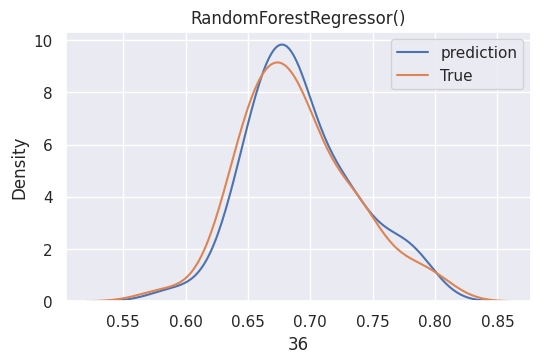

R2_score:  0.8599526722432255
MSE score:  0.0002728258707567212
MAE score:  0.0133538800657652


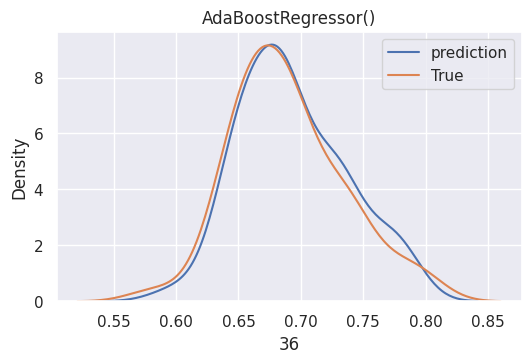

R2_score:  0.9083225545048736
MSE score:  0.0001785966165623592
MAE score:  0.010774702180499116


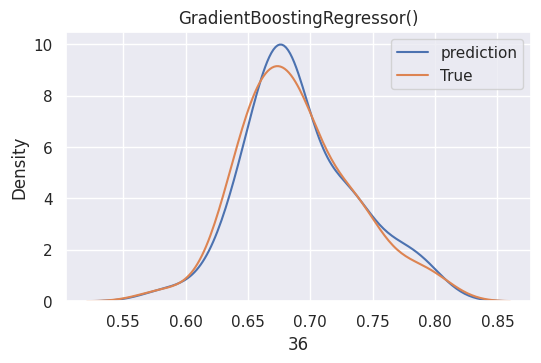

R2_score:  0.8062049077541318
MSE score:  0.00037753176470588164
MAE score:  0.016505882352941162


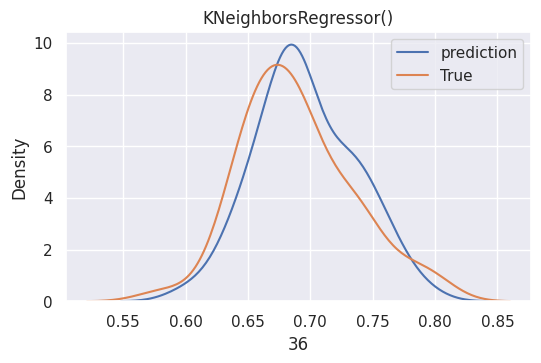

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


R2_score:  0.8186884260693551
MSE score:  0.00035321265195298936
MAE score:  0.01476927708351386


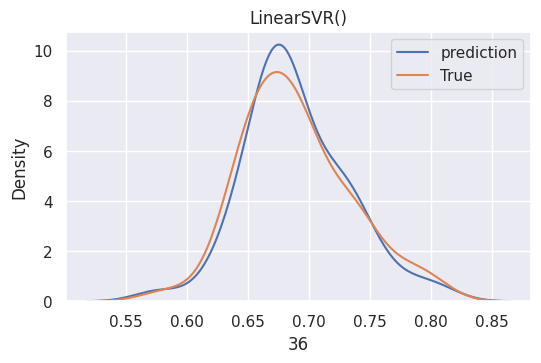

R2_score:  0.7780237702688888
MSE score:  0.00043243137254901957
MAE score:  0.016117647058823525


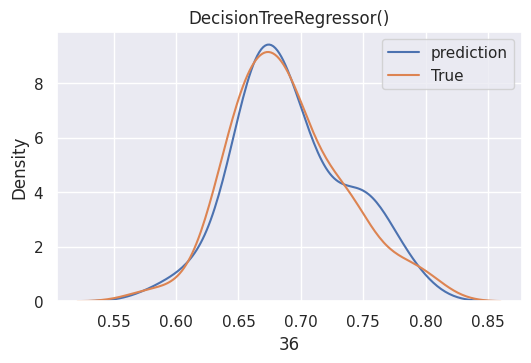

R2_score:  -0.18627649698267312
MSE score:  0.002310982461654824
MAE score:  0.02843532058673551


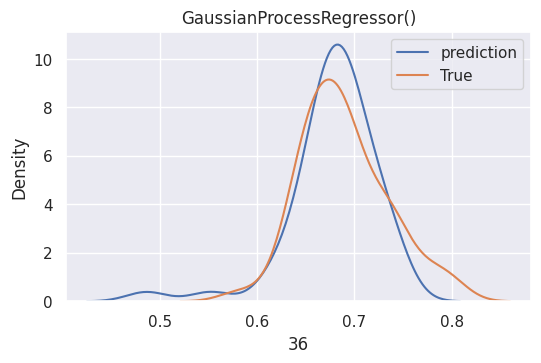

R2_score:  0.896318659789576
MSE score:  0.00020198137570507437
MAE score:  0.011477849343243763


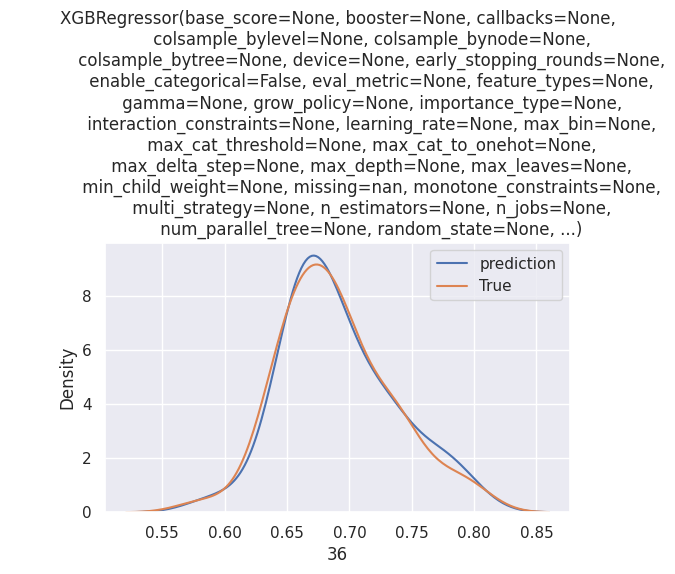

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1364
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 26
[LightGBM] [Info] Start training from score 0.691119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

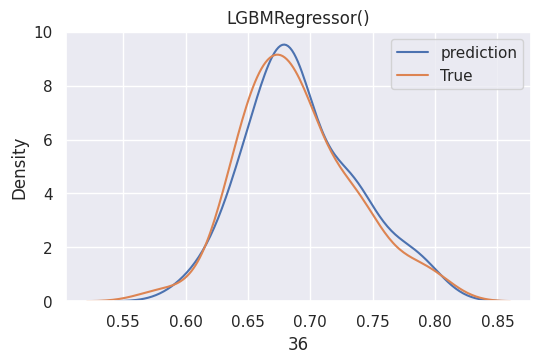

Learning rate set to 0.031775
0:	learn: 0.0498987	total: 5.31ms	remaining: 5.31s
1:	learn: 0.0488911	total: 7.76ms	remaining: 3.87s
2:	learn: 0.0479213	total: 10.2ms	remaining: 3.4s
3:	learn: 0.0470833	total: 12.8ms	remaining: 3.19s
4:	learn: 0.0461819	total: 15.6ms	remaining: 3.11s
5:	learn: 0.0453590	total: 18.2ms	remaining: 3.01s
6:	learn: 0.0445852	total: 20.8ms	remaining: 2.95s
7:	learn: 0.0436987	total: 23.4ms	remaining: 2.9s
8:	learn: 0.0428277	total: 25.9ms	remaining: 2.85s
9:	learn: 0.0420442	total: 28.6ms	remaining: 2.83s
10:	learn: 0.0412971	total: 31.1ms	remaining: 2.8s
11:	learn: 0.0405126	total: 33.8ms	remaining: 2.78s
12:	learn: 0.0396998	total: 36.3ms	remaining: 2.75s
13:	learn: 0.0389248	total: 38.9ms	remaining: 2.74s
14:	learn: 0.0382146	total: 41.6ms	remaining: 2.73s
15:	learn: 0.0376520	total: 44.2ms	remaining: 2.72s
16:	learn: 0.0370095	total: 46.8ms	remaining: 2.7s
17:	learn: 0.0363991	total: 49.4ms	remaining: 2.69s
18:	learn: 0.0358215	total: 51.9ms	remaining: 2.

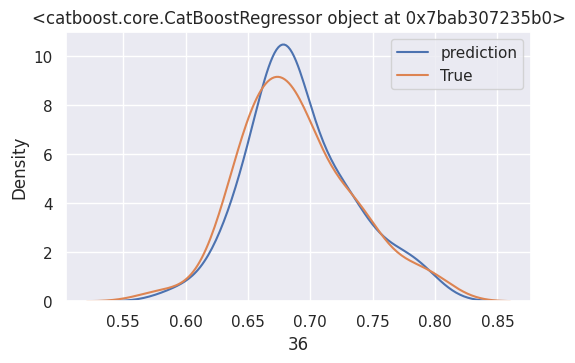

In [92]:
a = auto_train()

In [93]:
b = pd.DataFrame.from_dict(a,orient='index')
b[["R2_score","MSE","MAE"]]

,R2_score,MSE,MAE
LinearRegression,0.7979,0.0004,0.0157
SGDRegressor,0.6171,0.0007,0.0226
RidgeCV,0.8210,0.0003,0.0149
ElasticNetCV,0.8210,0.0003,0.0150
LassoCV,0.8211,0.0003,0.0150
LarsCV,-1.5425,0.0050,0.0508
RandomForestRegressor,0.8916,0.0002,0.0121
AdaBoostRegressor,0.8600,0.0003,0.0134
GradientBoostingRegressor,0.9083,0.0002,0.0108
KNeighborsRegressor,0.8062,0.0004,0.0165


In [37]:
data_temp = data_merge.copy()

In [38]:
for i in data_temp.columns:
  data_temp[i].fillna(data_temp[i].mean(), inplace =True)

In [39]:
data_temp

,0,1,2,3,4,5,6,7,10,11,...,19,20,24,25,26,30,32,33,34,36
0,9.80,0.0,2.23,98.440106,2.07,75.40,14.60,85.5,8350.0,100.0,...,0.000000,4.70,6.054,4064.8,6.054,0.387,1.558,6395.1,14.225,0.794
1,12.40,0.0,1.36,98.440106,2.48,74.24,18.60,98.9,1112.0,100.0,...,0.000000,2.00,3.699,630.5,3.698,0.351,1.096,4716.6,7.939,0.736
2,12.30,0.0,3.05,98.440106,2.66,74.26,18.50,98.5,1530.0,100.0,...,0.000000,11.10,5.446,751.6,5.445,0.365,1.802,6084.7,12.489,0.762
3,14.50,0.0,1.46,98.440106,2.22,73.40,21.80,97.0,2122.0,100.0,...,0.800000,1.40,4.777,734.7,4.777,0.397,1.350,5288.3,11.704,0.757
4,11.30,0.0,1.46,98.440106,2.59,74.71,16.80,86.8,1342.0,100.0,...,0.000000,3.80,3.693,1067.6,3.693,0.336,1.172,4563.1,7.893,0.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,8.98,5131.0,0.50,98.970000,1.68,75.80,13.54,72.8,2110.0,99.8,...,2.199365,12.46,4.794,584.3,4.794,0.345,1.842,5365.6,9.990,0.723
248,9.47,1296.0,0.01,97.090000,1.83,75.54,14.15,97.7,652.0,94.9,...,2.199365,1.08,3.761,394.1,3.761,0.340,1.280,4156.1,7.857,0.686
249,12.27,3084.0,0.93,98.300000,1.78,74.29,18.38,72.2,1002.0,98.7,...,2.199365,0.93,3.246,614.1,3.246,0.280,1.330,4816.2,5.912,0.655
250,11.51,1752.0,0.55,98.760000,1.56,74.61,17.21,68.6,1031.0,100.0,...,2.199365,0.31,3.642,480.9,3.642,0.234,1.832,5112.4,6.169,0.659


R2_score:  0.7979045837353178
MSE score:  0.00039370160646058335
MAE score:  0.015758420715426404


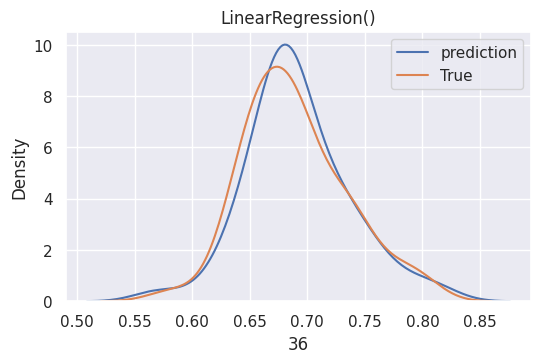

R2_score:  0.7150357936226632
MSE score:  0.0005551381021308644
MAE score:  0.020293753487783055


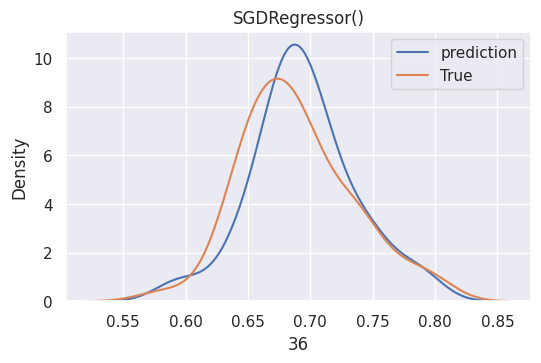

R2_score:  0.8231224981605997
MSE score:  0.0003445746465110515
MAE score:  0.01477360560118479


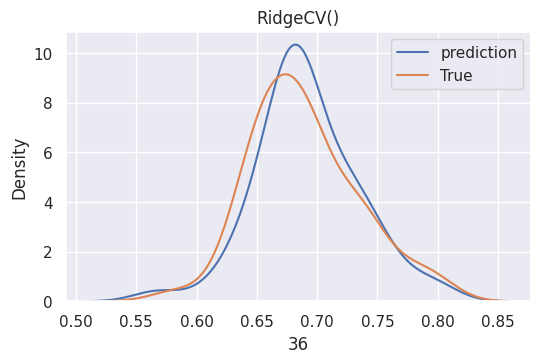

R2_score:  0.8231573716994336
MSE score:  0.00034450670945183627
MAE score:  0.014818816044322728


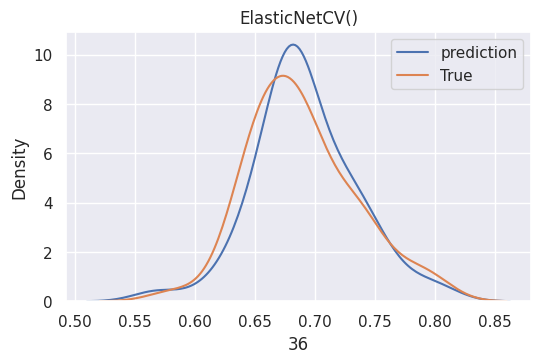

R2_score:  0.8240371679481695
MSE score:  0.00034279278044301774
MAE score:  0.014803532706094313


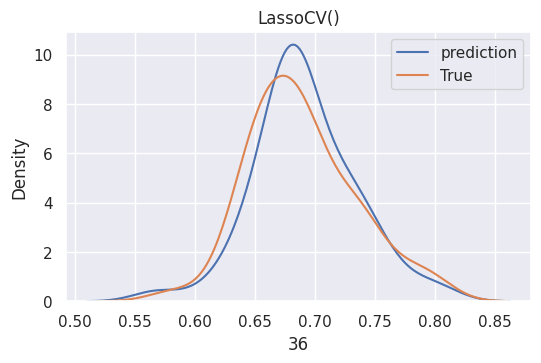

R2_score:  0.7658262890112786
MSE score:  0.00045619325718080473
MAE score:  0.01663209418583382


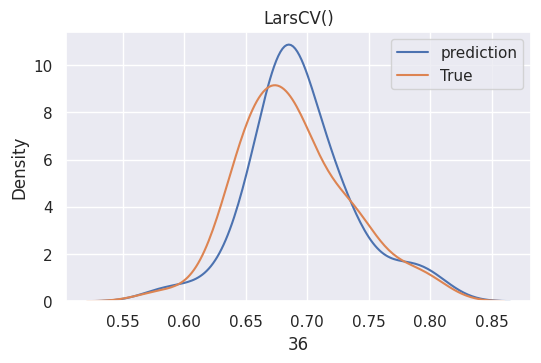

R2_score:  0.8934488411095944
MSE score:  0.00020757206274509894
MAE score:  0.011553333333333332


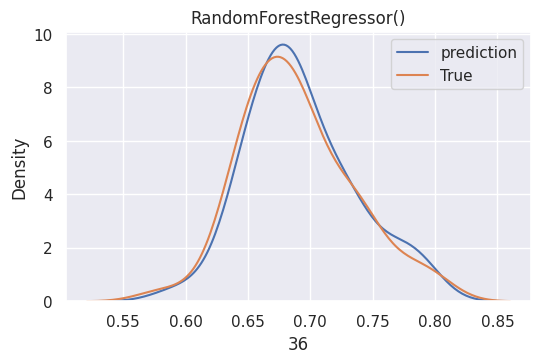

R2_score:  0.8683721937174642
MSE score:  0.00025642382071865486
MAE score:  0.013040291771505213


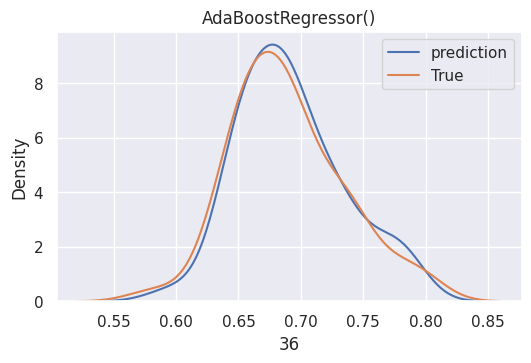

R2_score:  0.913690612392132
MSE score:  0.0001681391155816387
MAE score:  0.010384618429339779


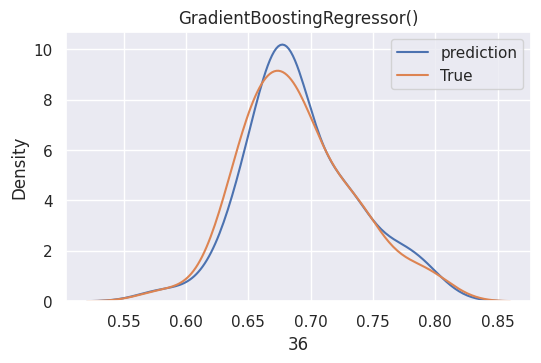

R2_score:  0.8191869038141294
MSE score:  0.00035224156862745035
MAE score:  0.015560784313725469


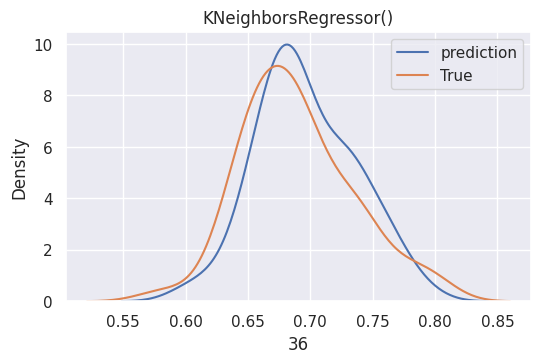

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


R2_score:  0.7881363179000218
MSE score:  0.0004127311422252801
MAE score:  0.015871430892747694


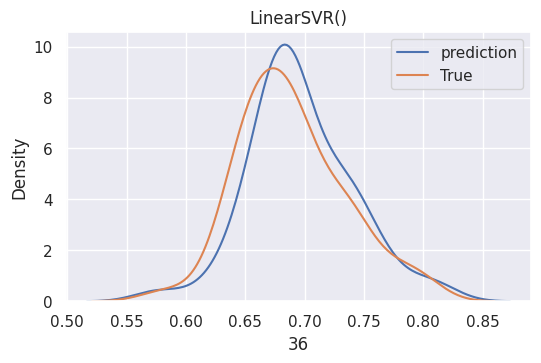

R2_score:  0.7868408182984732
MSE score:  0.00041525490196078416
MAE score:  0.015843137254901957


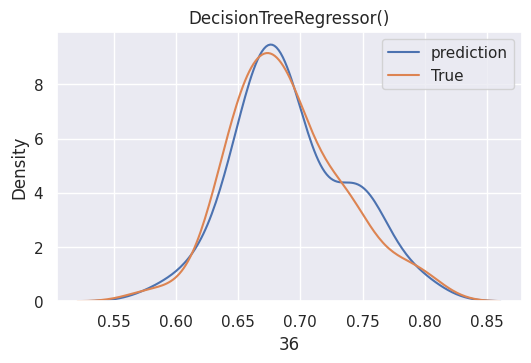

R2_score:  -0.03289626685709868
MSE score:  0.0020121827950624577
MAE score:  0.025600481122516144


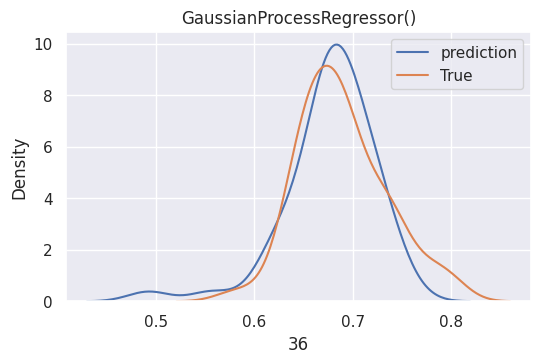

R2_score:  0.8944513138545628
MSE score:  0.00020561914794167728
MAE score:  0.011332524636212513


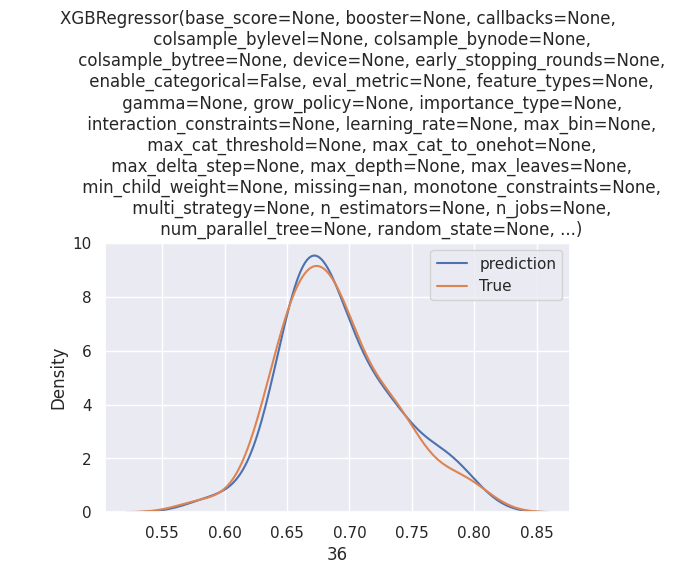

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1368
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 26
[LightGBM] [Info] Start training from score 0.691119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

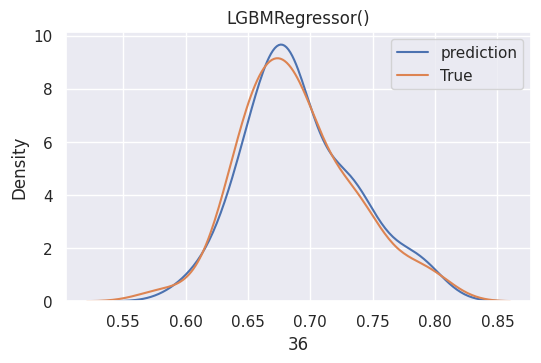

Learning rate set to 0.031775
0:	learn: 0.0498397	total: 6.94ms	remaining: 6.93s
1:	learn: 0.0488354	total: 10.2ms	remaining: 5.08s
2:	learn: 0.0477988	total: 12.8ms	remaining: 4.25s
3:	learn: 0.0468753	total: 15.2ms	remaining: 3.79s
4:	learn: 0.0459654	total: 17.8ms	remaining: 3.54s
5:	learn: 0.0452319	total: 20.3ms	remaining: 3.36s
6:	learn: 0.0444141	total: 22.8ms	remaining: 3.23s
7:	learn: 0.0435244	total: 25.3ms	remaining: 3.13s
8:	learn: 0.0426321	total: 27.7ms	remaining: 3.05s
9:	learn: 0.0419416	total: 30.2ms	remaining: 2.99s
10:	learn: 0.0411494	total: 32.5ms	remaining: 2.92s
11:	learn: 0.0404160	total: 35ms	remaining: 2.88s
12:	learn: 0.0397231	total: 37.4ms	remaining: 2.84s
13:	learn: 0.0390943	total: 39.8ms	remaining: 2.8s
14:	learn: 0.0383308	total: 42.3ms	remaining: 2.77s
15:	learn: 0.0376142	total: 44.7ms	remaining: 2.75s
16:	learn: 0.0369335	total: 47.2ms	remaining: 2.73s
17:	learn: 0.0362649	total: 49.6ms	remaining: 2.71s
18:	learn: 0.0356314	total: 52.2ms	remaining: 2

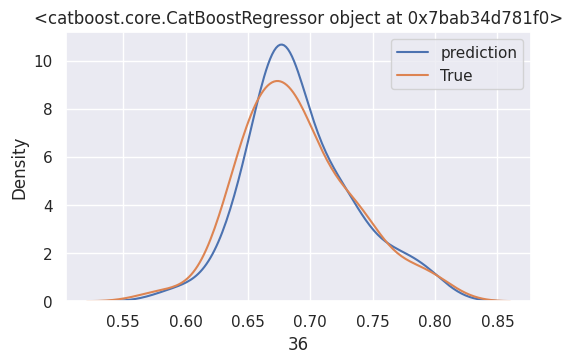

In [40]:
a = auto_train()

In [41]:
b = pd.DataFrame.from_dict(a,orient='index')
b[["R2_score","MSE","MAE"]]

,R2_score,MSE,MAE
LinearRegression,0.7979,0.0004,0.0158
SGDRegressor,0.7150,0.0006,0.0203
RidgeCV,0.8231,0.0003,0.0148
ElasticNetCV,0.8232,0.0003,0.0148
LassoCV,0.8240,0.0003,0.0148
LarsCV,0.7658,0.0005,0.0166
RandomForestRegressor,0.8934,0.0002,0.0116
AdaBoostRegressor,0.8684,0.0003,0.0130
GradientBoostingRegressor,0.9137,0.0002,0.0104
KNeighborsRegressor,0.8192,0.0004,0.0156


In [46]:
data_temp = data_merge.copy()

In [47]:
for i in data_temp.columns:
  data_temp[i].fillna(0, inplace =True)

In [48]:
data_temp

,0,1,2,3,4,5,6,7,10,11,...,19,20,24,25,26,30,32,33,34,36
0,9.80,0.0,2.23,0.00,2.07,75.40,14.60,85.5,8350.0,100.0,...,0.0,4.70,6.054,4064.8,6.054,0.387,1.558,6395.1,14.225,0.794
1,12.40,0.0,1.36,0.00,2.48,74.24,18.60,98.9,1112.0,100.0,...,0.0,2.00,3.699,630.5,3.698,0.351,1.096,4716.6,7.939,0.736
2,12.30,0.0,3.05,0.00,2.66,74.26,18.50,98.5,1530.0,100.0,...,0.0,11.10,5.446,751.6,5.445,0.365,1.802,6084.7,12.489,0.762
3,14.50,0.0,1.46,0.00,2.22,73.40,21.80,97.0,2122.0,100.0,...,0.8,1.40,4.777,734.7,4.777,0.397,1.350,5288.3,11.704,0.757
4,11.30,0.0,1.46,0.00,2.59,74.71,16.80,86.8,1342.0,100.0,...,0.0,3.80,3.693,1067.6,3.693,0.336,1.172,4563.1,7.893,0.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,8.98,5131.0,0.50,98.97,1.68,75.80,13.54,72.8,2110.0,99.8,...,0.0,12.46,4.794,584.3,4.794,0.345,1.842,5365.6,9.990,0.723
248,9.47,1296.0,0.01,97.09,1.83,75.54,14.15,97.7,652.0,94.9,...,0.0,1.08,3.761,394.1,3.761,0.340,1.280,4156.1,7.857,0.686
249,12.27,3084.0,0.93,98.30,1.78,74.29,18.38,72.2,1002.0,98.7,...,0.0,0.93,3.246,614.1,3.246,0.280,1.330,4816.2,5.912,0.655
250,11.51,1752.0,0.55,98.76,1.56,74.61,17.21,68.6,1031.0,100.0,...,0.0,0.31,3.642,480.9,3.642,0.234,1.832,5112.4,6.169,0.659


R2_score:  0.7891340696554127
MSE score:  0.00041078742437058226
MAE score:  0.016070667512534224


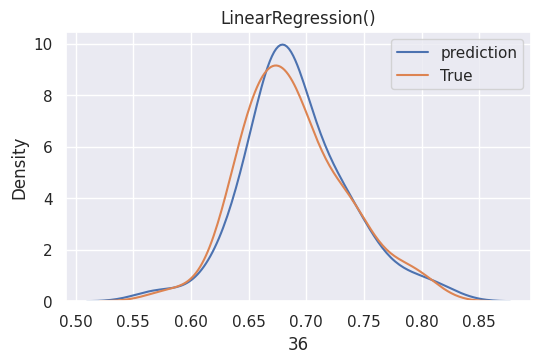

R2_score:  0.39455855508143023
MSE score:  0.0011794590589332113
MAE score:  0.02671108573393


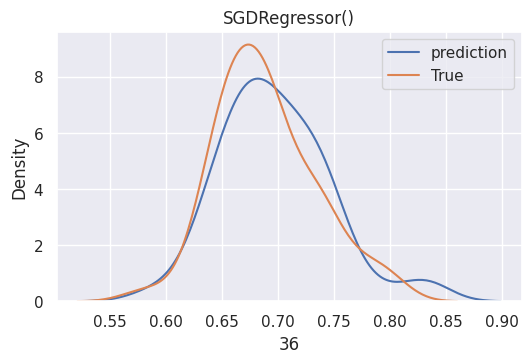

R2_score:  0.8164428375531783
MSE score:  0.00035758727767488306
MAE score:  0.015145223859521134


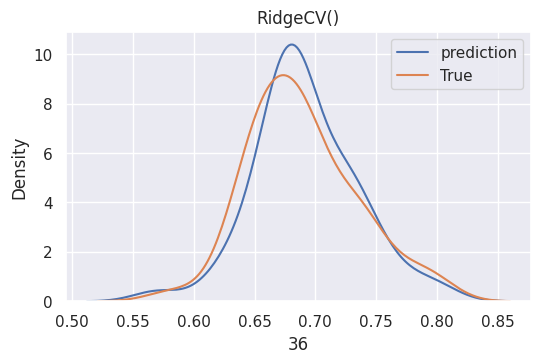

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001228856432862538, tolerance: 4.0271009375000004e-05
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.229789416190625e-05, tolerance: 4.019324968944099e-05
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0003041278555213217, tolerance: 4.019324968944099e-05
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_desce

R2_score:  0.8141048675106646
MSE score:  0.00036214187163157536
MAE score:  0.015223931550858407


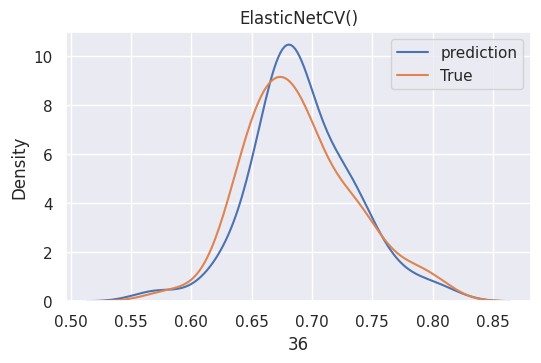

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00016996986397983804, tolerance: 4.0271009375000004e-05
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0001453018480805368, tolerance: 4.019324968944099e-05
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0004237145203056028, tolerance: 4.019324968944099e-05
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_desc

R2_score:  0.8150892077964791
MSE score:  0.000360224280629306
MAE score:  0.015203657848932088


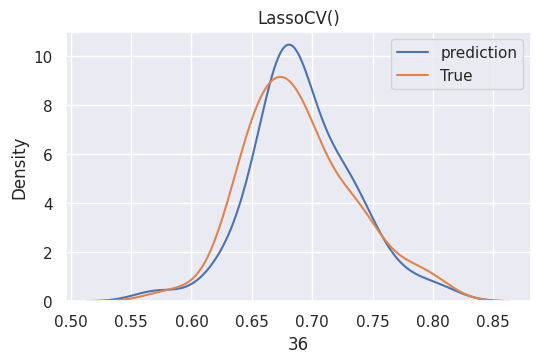

R2_score:  -0.04616708540802272
MSE score:  0.002038035645558101
MAE score:  0.029551946807246755


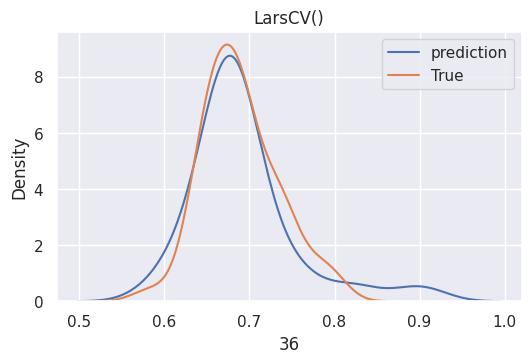

R2_score:  0.8870679364049987
MSE score:  0.00022000268823529366
MAE score:  0.01185509803921566


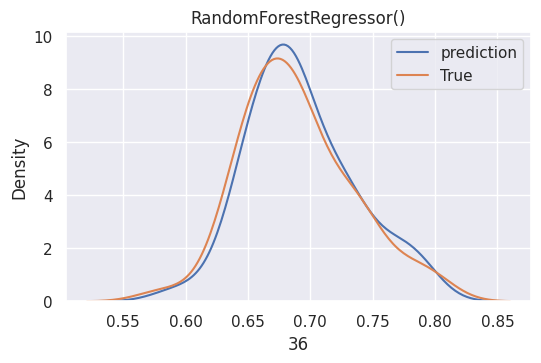

R2_score:  0.8666551728896045
MSE score:  0.00025976874496656214
MAE score:  0.01305251118442631


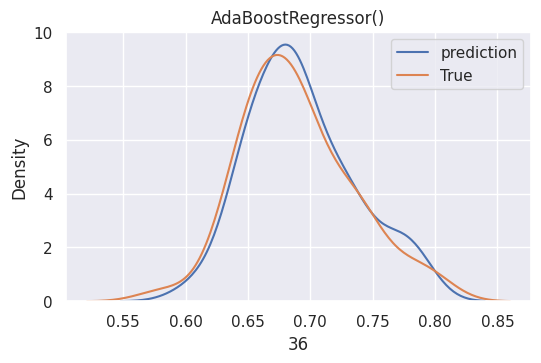

R2_score:  0.9123732204329694
MSE score:  0.0001707055237676674
MAE score:  0.010273507546179417


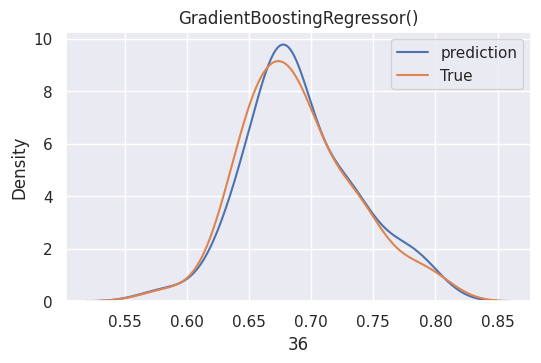

R2_score:  0.7520054264829578
MSE score:  0.00048311764705882344
MAE score:  0.018105882352941173


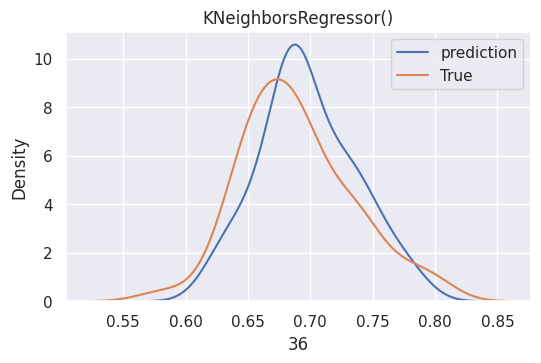

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


R2_score:  0.807761873997327
MSE score:  0.0003744986424189911
MAE score:  0.015156356307270198


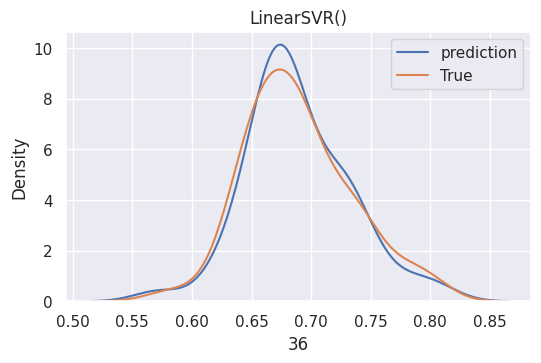

R2_score:  0.7724174965788448
MSE score:  0.0004433529411764705
MAE score:  0.01590196078431372


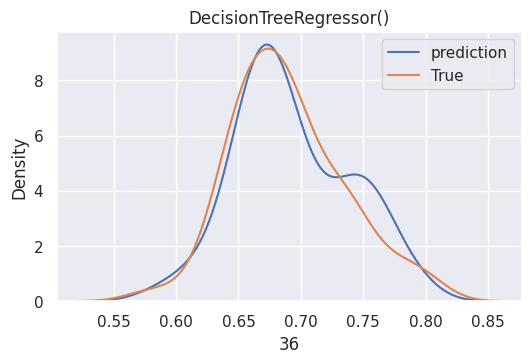

R2_score:  -1.2512971035249558
MSE score:  0.0043857466075183215
MAE score:  0.03749980018971332


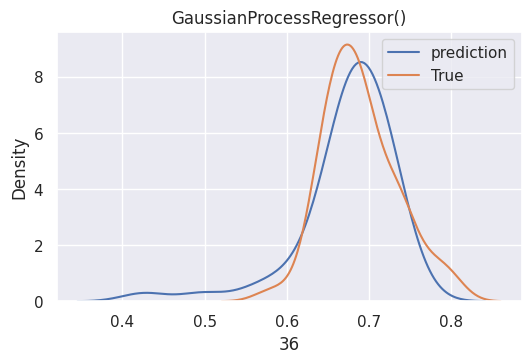

R2_score:  0.9048188496185504
MSE score:  0.00018542217583433508
MAE score:  0.010815943876902257


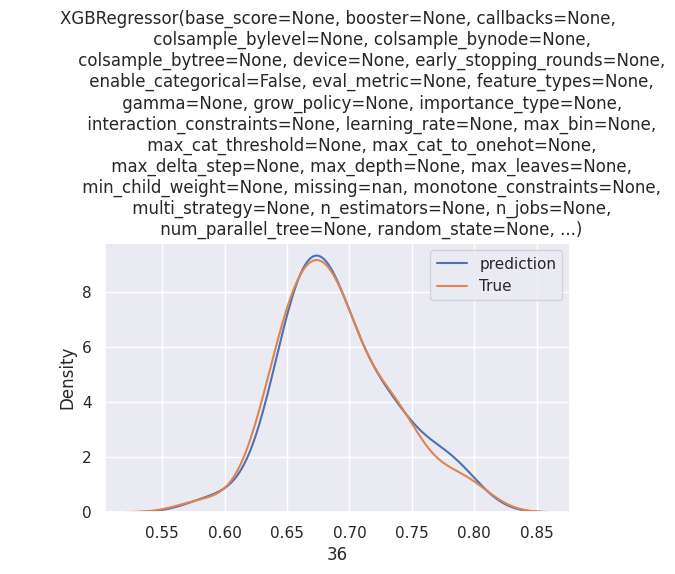

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1365
[LightGBM] [Info] Number of data points in the train set: 201, number of used features: 26
[LightGBM] [Info] Start training from score 0.691119
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

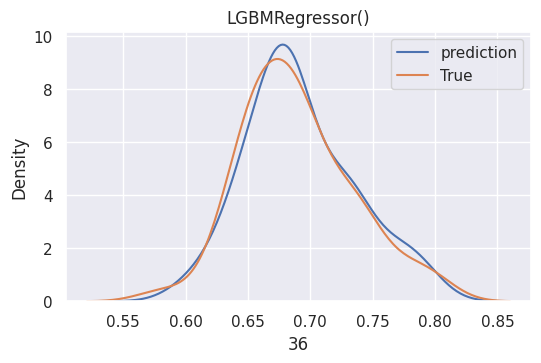

Learning rate set to 0.031775
0:	learn: 0.0500287	total: 9.3ms	remaining: 9.3s
1:	learn: 0.0490127	total: 12.2ms	remaining: 6.08s
2:	learn: 0.0481376	total: 14.8ms	remaining: 4.92s
3:	learn: 0.0473762	total: 17.4ms	remaining: 4.33s
4:	learn: 0.0465529	total: 20ms	remaining: 3.98s
5:	learn: 0.0456485	total: 22.6ms	remaining: 3.74s
6:	learn: 0.0448244	total: 25.3ms	remaining: 3.59s
7:	learn: 0.0438279	total: 27.7ms	remaining: 3.44s
8:	learn: 0.0429122	total: 30.2ms	remaining: 3.33s
9:	learn: 0.0420691	total: 32.7ms	remaining: 3.24s
10:	learn: 0.0413283	total: 35.1ms	remaining: 3.16s
11:	learn: 0.0404913	total: 37.6ms	remaining: 3.1s
12:	learn: 0.0397869	total: 40.1ms	remaining: 3.04s
13:	learn: 0.0390323	total: 42.7ms	remaining: 3.01s
14:	learn: 0.0382879	total: 45.3ms	remaining: 2.98s
15:	learn: 0.0376015	total: 47.8ms	remaining: 2.94s
16:	learn: 0.0369076	total: 50.3ms	remaining: 2.91s
17:	learn: 0.0363145	total: 52.8ms	remaining: 2.88s
18:	learn: 0.0357433	total: 55.3ms	remaining: 2.8

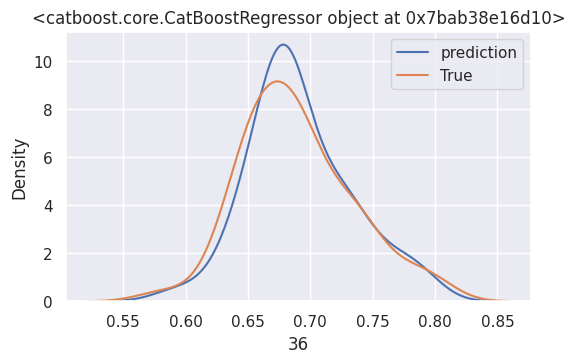

In [49]:
a = auto_train()

In [50]:
b = pd.DataFrame.from_dict(a,orient='index')
b[["R2_score","MSE","MAE"]]

,R2_score,MSE,MAE
LinearRegression,0.7891,0.0004,0.0161
SGDRegressor,0.3946,0.0012,0.0267
RidgeCV,0.8164,0.0004,0.0151
ElasticNetCV,0.8141,0.0004,0.0152
LassoCV,0.8151,0.0004,0.0152
LarsCV,-0.0462,0.0020,0.0296
RandomForestRegressor,0.8871,0.0002,0.0119
AdaBoostRegressor,0.8667,0.0003,0.0131
GradientBoostingRegressor,0.9124,0.0002,0.0103
KNeighborsRegressor,0.7520,0.0005,0.0181
